# Machine Learning Hackathon 2023

## Data Import

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
data = pd.read_csv("train.csv")
data.head()

Id Wohngebiet Nachbarschaft Bedingung1 Bedingung2  Wohnungsklasse  \
0   1         WN        Gallus       Norm       Norm              20   
1   2         WN        Gallus       Norm       Norm              20   
2   3         WN       Eckenhe       Norm       Norm              50   
3   4         WN       Ginnhei       Norm       Norm              60   
4   5         WN       Eckenhe       Norm       Norm              70   

  Gebauedetyp Wohnungsstil  Baujahr  Umbaujahr  ...  Garagenqualitaet  \
0        1Fam         1Sto     1962       1962  ...                Du   
1        1Fam         1Sto     2015       2016  ...                Du   
2        1Fam         2Sto     1930       1960  ...                Du   
3        1Fam         2Sto     2009       2010  ...                Du   
4        1Fam         2Sto     1939       1960  ...                Du   

   Garagenzustand EinfahrtGepflastert  Sondermerkmal SondermerkmalWert  \
0              Ar                   J            NaN               0.0   
1              Du                   J            NaN               0.0   
2              Du                   P            NaN               0.0   
3              Du                   J            NaN               0.0   
4              Du                   J            NaN               0.0   

  Verkaufsmonat Verkaufsjahr Verkaufstyp  Verkaufsbedingung Verkaufspreis  
0             7         2019        GarK             Normal       69700.0  
1             6         2017        GarK             Normal      133450.0  
2             9         2016        GarK             Normal      165750.0  
3             5         2017        GarK             Normal      157250.0  
4             6         2016        GarK             Normal      195500.0  

[5 rows x 81 columns]

## Exploring The Target Variable

In [2]:
# Description
data["Verkaufspreis"].describe()

count      2000.00000
mean     153708.42060
std       68822.30926
min       10870.65000
25%      109650.00000
50%      136000.00000
75%      181475.00000
max      641750.00000
Name: Verkaufspreis, dtype: float64

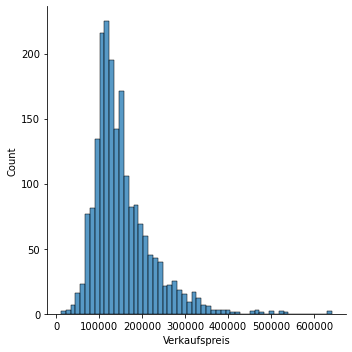

In [3]:
# Histogram plot
sn.displot(data["Verkaufspreis"])

In [4]:
#skewness and kurtosis
print("Skewness: %f" % data['Verkaufspreis'].skew())
print("Kurtosis: %f" % data['Verkaufspreis'].kurt())

Skewness: 1.796137
Kurtosis: 5.607445


**The Skewness is positivly appreciable. Also deviates from the normal distribution**

## Discovering The Other Variables 

Based on the description. We think that variables like : Wohngebiet,Wohnungsklasse,Gebauedetyp... has a good relationship
to the target variable

First we need to extract the numerical variables 

In [5]:
numerical_columns = data.select_dtypes(include=np.number).columns
numerical_columns = numerical_columns.to_list() 


Those Columns are not 100% filtered we need to extract the numeric categorical as well

In [6]:
to_delete = [] 
for i in range(len(numerical_columns)):
    if len(data[numerical_columns[i]].unique()) <= 20:
        to_delete.append(numerical_columns[i])
        
filtered_numerical_columns = [i for i in numerical_columns if i not in to_delete]



<AxesSubplot:xlabel='Umbaujahr', ylabel='Verkaufspreis'>

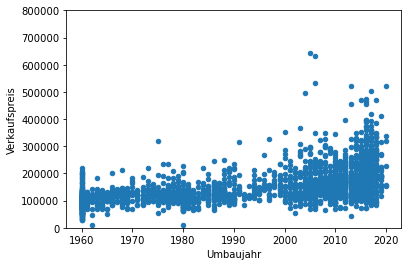

In [7]:
#scatter plot verkaufspreis/numeric variables
var = filtered_numerical_columns[2]
dataf = pd.concat([data['Verkaufspreis'], data[var]], axis=1)
dataf.plot.scatter(x=var, y='Verkaufspreis', ylim=(0,800000))

<AxesSubplot:xlabel='Grundstuecksgroesse', ylabel='Verkaufspreis'>

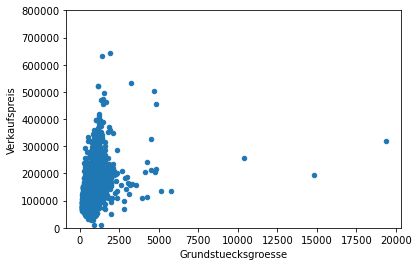

In [8]:
#scatter plot verkaufspreis/numeric variables
var = filtered_numerical_columns[3]
dataf = pd.concat([data['Verkaufspreis'], data[var]], axis=1)
dataf.plot.scatter(x=var, y='Verkaufspreis', ylim=(0,800000))

<AxesSubplot:xlabel='Strassenlaenge', ylabel='Verkaufspreis'>

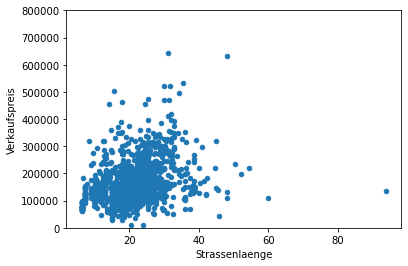

In [9]:
#scatter plot verkaufspreis/numeric variables
var = filtered_numerical_columns[4]
dataf = pd.concat([data['Verkaufspreis'], data[var]], axis=1)
dataf.plot.scatter(x=var, y='Verkaufspreis', ylim=(0,800000))

Now lets see a bit of the categorical variables 

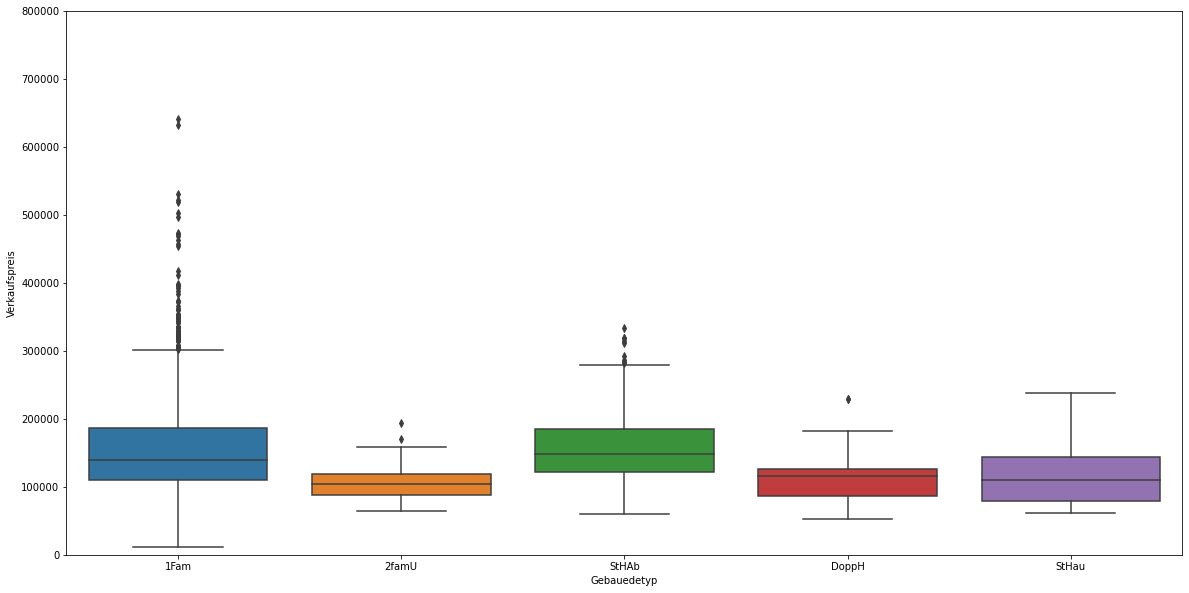

In [10]:
categorical_variables = data.select_dtypes(include=['object']).columns.tolist()
var = categorical_variables[4]
dataf = pd.concat([data['Verkaufspreis'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sn.boxplot(x=var, y="Verkaufspreis", data=dataf)
fig.axis(ymin=0, ymax=800000);

Until now we only intuitively analyzed the data. We will now dig a little bit deep inside and analyze the correlations to see if there are some really dependant features to pick.


## Correlations 

<AxesSubplot:>

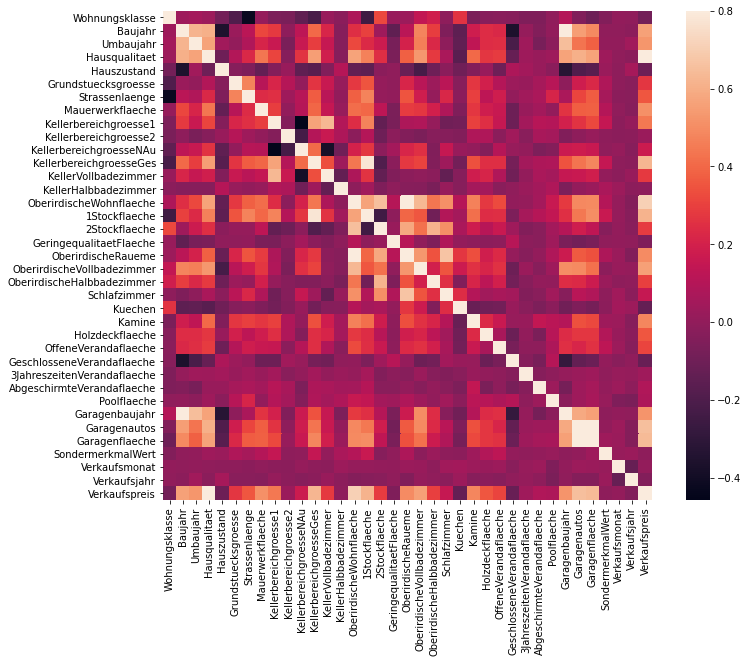

In [11]:
#correlation matrix
#for that pick the numeric variables
to_work_with = data.loc[:, data.columns != 'Id']
corrmat = to_work_with.corr()
f, ax = plt.subplots(figsize=(12, 9))
sn.heatmap(corrmat, vmax=.8, square=True)

Surprisingly we do not see "any" dependance

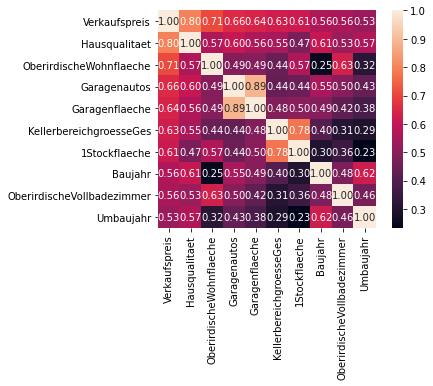

In [12]:
#Verkaufspreis correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Verkaufspreis')['Verkaufspreis'].index
cm = to_work_with[cols].corr()

#cm = np.corrcoef(to_work_with[cols].values.T)
#sn.set(font_scale=1.25)
hm = sn.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**these are the variables most correlated with Verkaufspreis**.
Now we see some scatterplots between the variables

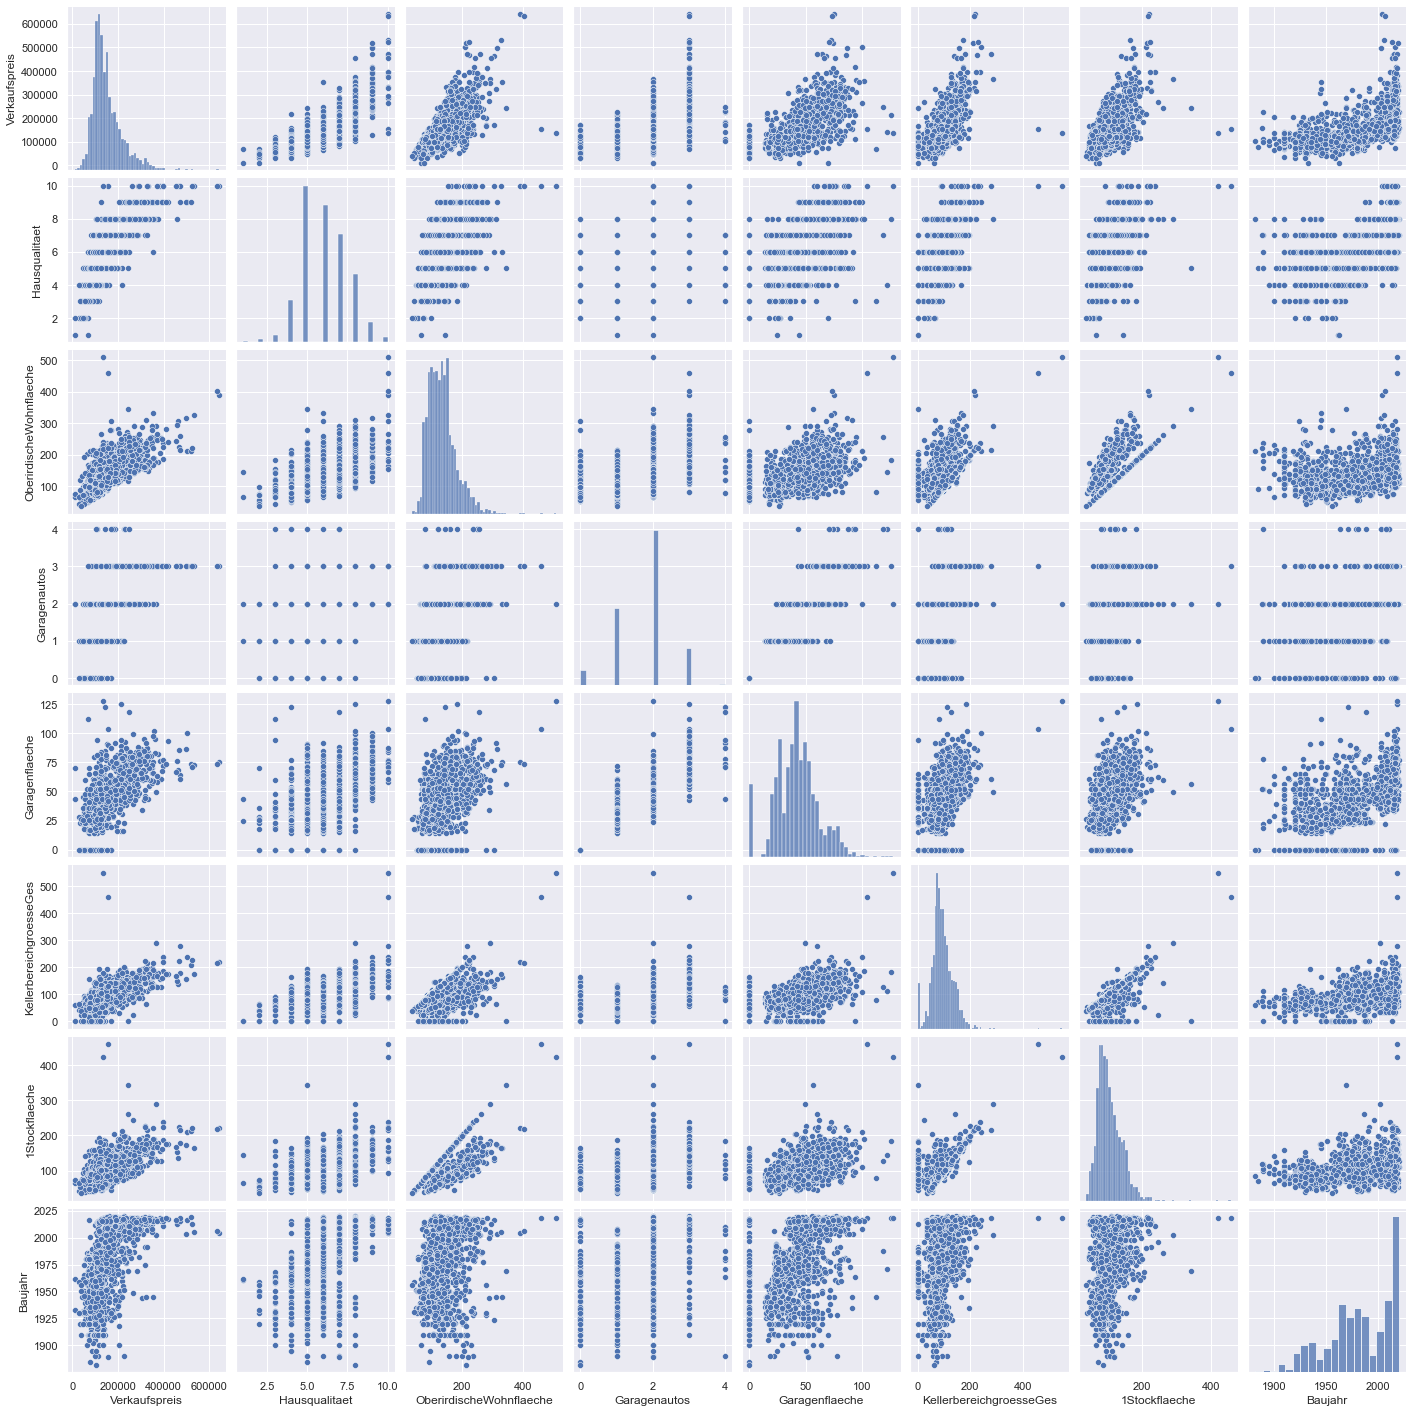

In [13]:
#scatterplot
sn.set()
cols = ['Verkaufspreis','Hausqualitaet', 'OberirdischeWohnflaeche', 'Garagenautos', 'Garagenflaeche', 'KellerbereichgroesseGes', '1Stockflaeche', 'Baujahr']
sn.pairplot(to_work_with[cols], height = 2.5)
plt.show();

Zu Beobachten sind "1Stockflaeche" und "KellerbereichgroesseGes" mit "OberirdischeWohnflaeche". Sie formen in ein paar Stellen fast eine Gerade Linie. Was logisch ist. Sie formen eine Grenze. Auserdem man kann sehen wie sich heutzutage die Preise erhöhen. Der Scatterplot dazu formt eine Art von exponentieller Funktion. 

# Missing Data
## Concerns : 
1. How Prevalent ?
2. Is it random ?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

In [14]:
# missing data
# checking nulls 
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total  Percent
Poolqualitaet        1990   0.9950
Sondermerkmal        1932   0.9660
Zufahrtsweg          1868   0.9340
Zaunqualitaet        1607   0.8035
Kaminqualitaet        960   0.4800
Strassenlaenge        338   0.1690
Garagenzustand        108   0.0540
Garagenqualitaet      108   0.0540
Garageninnenausbau    108   0.0540
Garagenbaujahr        108   0.0540
Garagentyp            107   0.0535
Kellerbelichtung       66   0.0330
Kellerhoehe            65   0.0325
Kellerzustand          65   0.0325
Kellerbereich1         63   0.0315
Kellerbereich2         63   0.0315
Mauerwerktyp           14   0.0070
Mauerwerkflaeche       14   0.0070
Wohngebiet              3   0.0015
Versorgung              2   0.0010

An idea to handle missing data is to have a threshold. In our case we would consider that if its >= 15%, we would ignore
the feature and pretend its never existed. We would also say that those features wont have a big impact on the data since 
they dont really represent reasons why the price should be higher.

For the garage data they have the same percentage. Maybe it applies for the same entries because they are all garage infos. Same Logic goes for the Basement info.

For Mauer infos they also have the same percentage. We should see if they are correlated with some other variables so we dont 
really need their presence 

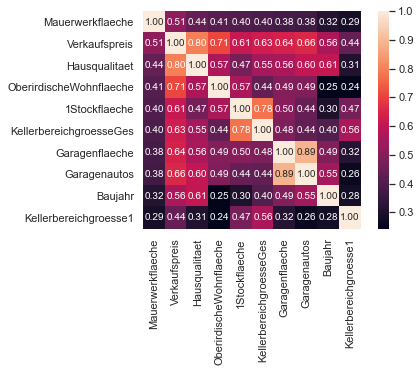

In [15]:
#Mauerwerktyp correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Mauerwerkflaeche')['Mauerwerkflaeche'].index
cm = to_work_with[cols].corr()

#cm = np.corrcoef(to_work_with[cols].values.T)
#sn.set(font_scale=1.25)
hm = sn.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We dont really see any good dependance in here so we will still have them. For Wohngebiet and Versorgung we are just gonna
delete the entries since they are only a few

In [16]:
#dealing with missing data
df_train = data
df_train = df_train.drop((missing_data[missing_data['Percent'] > 0.15]).index,1)
df_train.isnull().sum().max() #just checking that there's no missing data missing...


108

Now we still have 108 null entries that should be analyzed. There is a big possibility that they intersect (Intuition)

In [17]:
# missing data
# checking nulls 
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

Total  Percent
Garagenzustand             108   0.0540
Garagenqualitaet           108   0.0540
Garageninnenausbau         108   0.0540
Garagenbaujahr             108   0.0540
Garagentyp                 107   0.0535
Kellerbelichtung            66   0.0330
Kellerhoehe                 65   0.0325
Kellerzustand               65   0.0325
Kellerbereich2              63   0.0315
Kellerbereich1              63   0.0315
Mauerwerkflaeche            14   0.0070
Mauerwerktyp                14   0.0070
Wohngebiet                   3   0.0015
Funktionalitaet              2   0.0010
KellerHalbbadezimmer         2   0.0010
KellerVollbadezimmer         2   0.0010
Versorgung                   2   0.0010
KuechenQualitaet             1   0.0005
Elektrik                     1   0.0005
Kellerbereichgroesse1        1   0.0005
KellerbereichgroesseGes      1   0.0005
KellerbereichgroesseNAu      1   0.0005
Kellerbereichgroesse2        1   0.0005
Garagenautos                 1   0.0005
Garagenflaeche               1   0.0005
Verkaufstyp                  1   0.0005
Dachtyp                      0   0.0000
Verkleidung2                 0   0.0000
Verkleidung1                 0   0.0000
Fundament                    0   0.0000

Garagenzustand-Garagenqualitaet-Garageninnenausbau-Garagenbaujahr have the same missing values. lets see some correlations 

In [18]:
#Garagenzustand correlation matrix
null_garagenzustand = np.where(df_train['Garagenzustand'].isnull())[0]
null_garagenqualitaet = np.where(df_train['Garagenqualitaet'].isnull())[0]
null_garageninnenausbau = np.where(df_train['Garageninnenausbau'].isnull())[0]
null_garagenbaujahr = np.where(df_train['Garagenbaujahr'].isnull())[0]
# see if the tables are equal
print(np.array_equal(null_garagenzustand,null_garagenqualitaet))
print(np.array_equal(null_garagenzustand,null_garageninnenausbau))
print(np.array_equal(null_garagenzustand,null_garagenbaujahr))

True
True
True


The same entries are missing

Lets do the cleaning in another way.

In [19]:
import math
print("Percentage of Nan in each Column")
for column, percentage in ((data.isna().sum() / data.shape[0]) * 100).items():
    count = math.ceil(percentage)
    if count > 0:
        print(f"{column} : {count} %")

Percentage of Nan in each Column
Wohngebiet : 1 %
Versorgung : 1 %
Strassenlaenge : 17 %
Zufahrtsweg : 94 %
Mauerwerktyp : 1 %
Mauerwerkflaeche : 1 %
Kellerhoehe : 4 %
Kellerzustand : 4 %
Kellerbelichtung : 4 %
Kellerbereich1 : 4 %
Kellerbereichgroesse1 : 1 %
Kellerbereich2 : 4 %
Kellerbereichgroesse2 : 1 %
KellerbereichgroesseNAu : 1 %
KellerbereichgroesseGes : 1 %
KellerVollbadezimmer : 1 %
KellerHalbbadezimmer : 1 %
Funktionalitaet : 1 %
KuechenQualitaet : 1 %
Kaminqualitaet : 48 %
Elektrik : 1 %
Poolqualitaet : 100 %
Zaunqualitaet : 81 %
Garagentyp : 6 %
Garagenbaujahr : 6 %
Garageninnenausbau : 6 %
Garagenautos : 1 %
Garagenflaeche : 1 %
Garagenqualitaet : 6 %
Garagenzustand : 6 %
Sondermerkmal : 97 %
Verkaufstyp : 1 %


Need to read data description to see if those missing values are really NAs or just that its not available. Some columns we can 
drop are : Poolqualitaet (means that all of data has no pool). For some data we can fill but others we can delete the rows correspondant.

# Dealing with NAs that we already have from the description

In [20]:
has_na_desc = ["Kellerhoehe","Kellerzustand","Kellerbelichtung","Kellerbereich1","Kellerbereich2"
               ,"Kaminqualitaet","Poolqualitaet","Zaunqualitaet","Garagentyp","Garageninnenausbau","Garagenqualitaet"
              ,"Garagenzustand","Sondermerkmal"]

## filling NAs with "kein"
train = data
for i in range(len(has_na_desc)):
    train[has_na_desc[i]] = train[has_na_desc[i]].fillna("kein")
train.head()

Id Wohngebiet Nachbarschaft Bedingung1 Bedingung2  Wohnungsklasse  \
0   1         WN        Gallus       Norm       Norm              20   
1   2         WN        Gallus       Norm       Norm              20   
2   3         WN       Eckenhe       Norm       Norm              50   
3   4         WN       Ginnhei       Norm       Norm              60   
4   5         WN       Eckenhe       Norm       Norm              70   

  Gebauedetyp Wohnungsstil  Baujahr  Umbaujahr  ...  Garagenqualitaet  \
0        1Fam         1Sto     1962       1962  ...                Du   
1        1Fam         1Sto     2015       2016  ...                Du   
2        1Fam         2Sto     1930       1960  ...                Du   
3        1Fam         2Sto     2009       2010  ...                Du   
4        1Fam         2Sto     1939       1960  ...                Du   

   Garagenzustand EinfahrtGepflastert  Sondermerkmal SondermerkmalWert  \
0              Ar                   J           kein               0.0   
1              Du                   J           kein               0.0   
2              Du                   P           kein               0.0   
3              Du                   J           kein               0.0   
4              Du                   J           kein               0.0   

  Verkaufsmonat Verkaufsjahr Verkaufstyp  Verkaufsbedingung Verkaufspreis  
0             7         2019        GarK             Normal       69700.0  
1             6         2017        GarK             Normal      133450.0  
2             9         2016        GarK             Normal      165750.0  
3             5         2017        GarK             Normal      157250.0  
4             6         2016        GarK             Normal      195500.0  

[5 rows x 81 columns]

In [21]:
## checking for NAs now after filling the known ones
print("Percentage of Nan in each Column")
for column, percentage in ((train.isna().sum() / train.shape[0]) * 100).items():
    count = math.ceil(percentage)
    if count > 0:
        print(f"{column} : {count} %")

Percentage of Nan in each Column
Wohngebiet : 1 %
Versorgung : 1 %
Strassenlaenge : 17 %
Zufahrtsweg : 94 %
Mauerwerktyp : 1 %
Mauerwerkflaeche : 1 %
Kellerbereichgroesse1 : 1 %
Kellerbereichgroesse2 : 1 %
KellerbereichgroesseNAu : 1 %
KellerbereichgroesseGes : 1 %
KellerVollbadezimmer : 1 %
KellerHalbbadezimmer : 1 %
Funktionalitaet : 1 %
KuechenQualitaet : 1 %
Elektrik : 1 %
Garagenbaujahr : 6 %
Garagenautos : 1 %
Garagenflaeche : 1 %
Verkaufstyp : 1 %


now we only have these NAs. we delete the responsible rows. For Zufahrtsweg. We will drop it and Strassenlaenge we will see 

In [22]:
#train.drop(columns=['Zufahrtsweg'],inplace=True)


In [23]:
print("Percentage of Nan in each Column")
for column, percentage in ((train.isna().sum() / train.shape[0]) * 100).items():
    count = math.ceil(percentage)
    if count > 0:
        print(f"{column} : {count} %")

Percentage of Nan in each Column
Wohngebiet : 1 %
Versorgung : 1 %
Strassenlaenge : 17 %
Zufahrtsweg : 94 %
Mauerwerktyp : 1 %
Mauerwerkflaeche : 1 %
Kellerbereichgroesse1 : 1 %
Kellerbereichgroesse2 : 1 %
KellerbereichgroesseNAu : 1 %
KellerbereichgroesseGes : 1 %
KellerVollbadezimmer : 1 %
KellerHalbbadezimmer : 1 %
Funktionalitaet : 1 %
KuechenQualitaet : 1 %
Elektrik : 1 %
Garagenbaujahr : 6 %
Garagenautos : 1 %
Garagenflaeche : 1 %
Verkaufstyp : 1 %


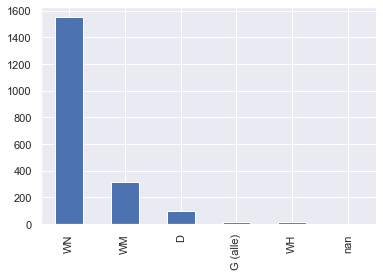

In [24]:
train['Wohngebiet'].value_counts(dropna = False).plot(kind='bar')
## fill with mode because only 1%
train['Wohngebiet'] = train['Wohngebiet'].fillna(train['Wohngebiet'].mode()[0])

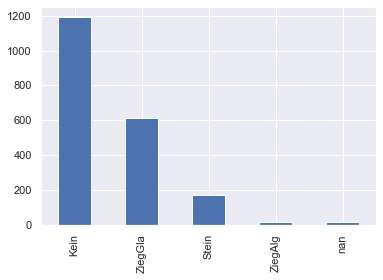

In [25]:
# Histogram plot
train['Mauerwerktyp'].value_counts(dropna = False).plot(kind='bar')
## Mauerwerktyp und Mauerwerkflaeche : rows sollen gelöscht werden
nan_mauerwerktyp = set(train[train['Mauerwerktyp'].isnull()].index.tolist()) 
nan_mauerwerkflaeche = set(train[train['Mauerwerkflaeche'].isnull()].index.tolist()) 

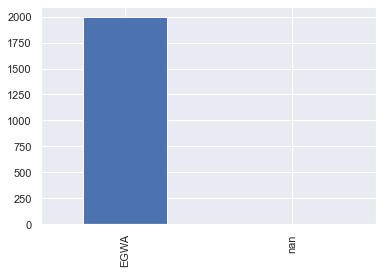

In [26]:
# Histogram plot
train['Versorgung'].value_counts(dropna = False).plot(kind='bar')
### hier nan mit egwa auffüllen
train['Versorgung'] = train['Versorgung'].fillna(train['Versorgung'].mode()[0])

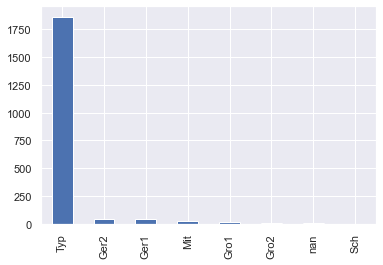

In [27]:
# Histogram plot
train['Funktionalitaet'].value_counts(dropna = False).plot(kind='bar')
## we fill with mode
train['Funktionalitaet'] = train['Funktionalitaet'].fillna(train['Funktionalitaet'].mode()[0])

<AxesSubplot:>

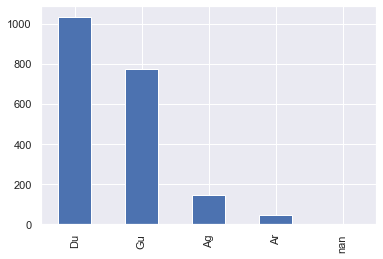

In [28]:
# Histogram plot
train['KuechenQualitaet'].value_counts(dropna = False).plot(kind='bar')
## maybe drop rows ?

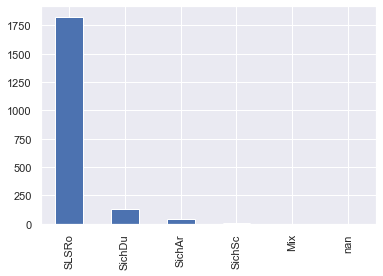

In [29]:
# Histogram plot
train['Elektrik'].value_counts(dropna = False).plot(kind='bar')
## fill with mode
train['Elektrik'] = train['Elektrik'].fillna(train['Elektrik'].mode()[0])

In [30]:
# Histogram plot
train['Garagenbaujahr'].value_counts(dropna = False) ## is this column even relevant?

NaN       108
2015.0     99
2016.0     79
2017.0     78
2014.0     72
         ... 
1918.0      1
1942.0      1
1905.0      1
1916.0      1
1939.0      1
Name: Garagenbaujahr, Length: 100, dtype: int64

True

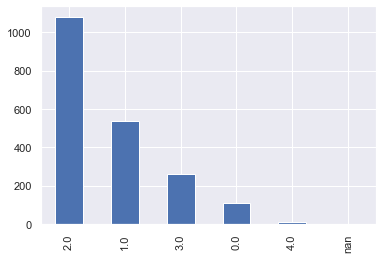

In [31]:
# Histogram plot
train['Garagenautos'].value_counts(dropna = False).plot(kind='bar')
nan_garagenautos = set(train[train['Garagenautos'].isnull()].index.tolist()) 
nan_garagenflaeche = set(train[train['Garagenflaeche'].isnull()].index.tolist()) 
nan_garagenautos == nan_garagenflaeche ## delete the rows

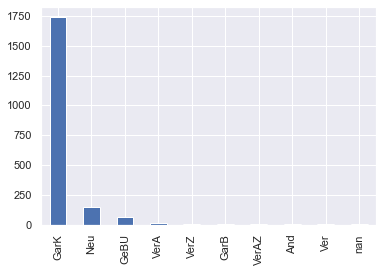

In [32]:
# Histogram plot
train['Verkaufstyp'].value_counts(dropna = False).plot(kind='bar') 
## fill with mode
train['Verkaufstyp'] = train['Verkaufstyp'].fillna(train['Verkaufstyp'].mode()[0])

In [33]:
##checking nan after a bit of cleaning
print("Percentage of Nan in each Column")
for column, percentage in ((train.isna().sum() / train.shape[0]) * 100).items():
    count = math.ceil(percentage)
    if count > 0:
        print(f"{column} : {count} %")

Percentage of Nan in each Column
Strassenlaenge : 17 %
Zufahrtsweg : 94 %
Mauerwerktyp : 1 %
Mauerwerkflaeche : 1 %
Kellerbereichgroesse1 : 1 %
Kellerbereichgroesse2 : 1 %
KellerbereichgroesseNAu : 1 %
KellerbereichgroesseGes : 1 %
KellerVollbadezimmer : 1 %
KellerHalbbadezimmer : 1 %
KuechenQualitaet : 1 %
Garagenbaujahr : 6 %
Garagenautos : 1 %
Garagenflaeche : 1 %


The basement columns have nan because of "kein" we filled before. lets check that first

In [34]:
kein_keller = set(train.index[train['Kellerzustand'] == 'kein'])
kein_groesse1 = set(train[train['Kellerbereichgroesse1'].isnull()].index.tolist())
kein_groesse2 = set(train[train['Kellerbereichgroesse2'].isnull()].index.tolist())
kein_groessenau = set(train[train['KellerbereichgroesseNAu'].isnull()].index.tolist())
kein_groessebad = set(train[train['KellerVollbadezimmer'].isnull()].index.tolist())
print(kein_groesse1.issubset(kein_keller))
print(kein_groesse2.issubset(kein_keller))
print(kein_groessenau.issubset(kein_keller))
print(kein_groessebad.issubset(kein_keller))

True
True
True
True


After a little bit of analysis we discovered that some missing values intersect with the kein keller column so we just need to fill it with 0.0

In [35]:
## handling basement missing values 
basement_data = ["Kellerbereichgroesse1","Kellerbereichgroesse2","KellerbereichgroesseNAu","KellerbereichgroesseGes","KellerVollbadezimmer"
                ,"KellerHalbbadezimmer"]
## filling with 0.0
for i in basement_data:
    train[i] = train[i].fillna(0.0)
    


In [36]:
##checking nan after a bit of cleaning
print("Percentage of Nan in each Column")
for column, percentage in ((train.isna().sum() / train.shape[0]) * 100).items():
    count = math.ceil(percentage)
    if count > 0:
        print(f"{column} : {count} %")

Percentage of Nan in each Column
Strassenlaenge : 17 %
Zufahrtsweg : 94 %
Mauerwerktyp : 1 %
Mauerwerkflaeche : 1 %
KuechenQualitaet : 1 %
Garagenbaujahr : 6 %
Garagenautos : 1 %
Garagenflaeche : 1 %


In [37]:
mauerwerktyp = set(train[train['Mauerwerktyp'].isnull()].index.tolist())
mauerwerkflaeche = set(train[train['Mauerwerkflaeche'].isnull()].index.tolist())
mauerwerktyp == mauerwerkflaeche

True

we will drop strassenlaengue. Its already correlated with Wohnklasse so we will not lose variation

In [38]:
train.drop(columns=['Strassenlaenge'],inplace=True)

In [39]:
##checking nan after a bit of cleaning
print("Percentage of Nan in each Column")
for column, percentage in ((train.isna().sum() / train.shape[0]) * 100).items():
    count = math.ceil(percentage)
    if count > 0:
        print(f"{column} : {count} %")

Percentage of Nan in each Column
Zufahrtsweg : 94 %
Mauerwerktyp : 1 %
Mauerwerkflaeche : 1 %
KuechenQualitaet : 1 %
Garagenbaujahr : 6 %
Garagenautos : 1 %
Garagenflaeche : 1 %


In [40]:
### analyzing garage missing data
gar = set(train[train['Garagentyp'] == 'kein'].index.tolist())
garautos = set(train[train['Garagenautos'].isnull()].index.tolist())
garflaeche = set(train[train['Garagenflaeche'].isnull()].index.tolist())
gar == garautos == garflaeche

## fill garautos and flaeche with mode 
## fill with mode
train['Garagenautos'] = train['Garagenautos'].fillna(train['Garagenautos'].mode()[0])
train['Garagenflaeche'] = train['Garagenflaeche'].fillna(train['Garagenflaeche'].mode()[0])

In [41]:
##checking nan after a bit of cleaning
print("Percentage of Nan in each Column")
for column, percentage in ((train.isna().sum() / train.shape[0]) * 100).items():
    count = math.ceil(percentage)
    if count > 0:
        print(f"{column} : {count} %")

Percentage of Nan in each Column
Zufahrtsweg : 94 %
Mauerwerktyp : 1 %
Mauerwerkflaeche : 1 %
KuechenQualitaet : 1 %
Garagenbaujahr : 6 %


In [42]:
## drop garagenbaujahr is correlated with hauszustand we wont lose variation
train.drop(columns=['Garagenbaujahr'],inplace=True)

In [43]:
##checking nan after a bit of cleaning
print("Percentage of Nan in each Column")
for column, percentage in ((train.isna().sum() / train.shape[0]) * 100).items():
    count = math.ceil(percentage)
    if count > 0:
        print(f"{column} : {count} %")

Percentage of Nan in each Column
Zufahrtsweg : 94 %
Mauerwerktyp : 1 %
Mauerwerkflaeche : 1 %
KuechenQualitaet : 1 %


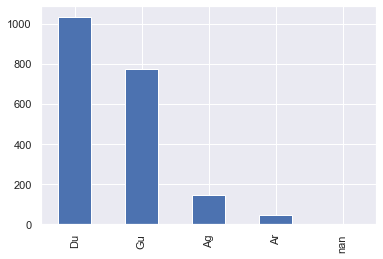

In [44]:
#Histogram
train['KuechenQualitaet'].value_counts(dropna = False).plot(kind='bar') 
## fill with mode
train['KuechenQualitaet'] = train['KuechenQualitaet'].fillna(train['KuechenQualitaet'].mode()[0])

In [45]:
##checking nan after a bit of cleaning
print("Percentage of Nan in each Column")
for column, percentage in ((train.isna().sum() / train.shape[0]) * 100).items():
    count = math.ceil(percentage)
    if count > 0:
        print(f"{column} : {count} %")

Percentage of Nan in each Column
Zufahrtsweg : 94 %
Mauerwerktyp : 1 %
Mauerwerkflaeche : 1 %


In [46]:
mauerwerktyp = set(train[train['Mauerwerktyp'].isnull()].index.tolist())
mauerwerkflaeche = set(train[train['Mauerwerkflaeche'].isnull()].index.tolist())
mauerwerktyp == mauerwerkflaeche

True

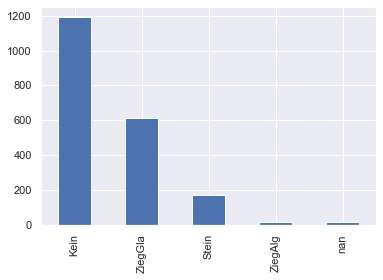

In [47]:
#Histogram
train['Mauerwerktyp'].value_counts(dropna = False).plot(kind='bar') 
## fill both with mode
train['Mauerwerktyp'] = train['Mauerwerktyp'].fillna(train['Mauerwerktyp'].mode()[0])
train['Mauerwerkflaeche'] = train['Mauerwerkflaeche'].fillna(train['Mauerwerkflaeche'].mode()[0])

# Removing Outliers 

In [48]:
from scipy.stats import zscore
def remove_outlier(df, x):
    df[f'{x}_zscore'] = zscore(df[f'{x}'])
    df.drop(df[(df[f'{x}_zscore'] >= 3) | (df[f'{x}_zscore'] <= -3)].index, inplace=True)
    df.drop(columns=[f'{x}_zscore'], inplace=True)

In [49]:
columns = train.select_dtypes('number').columns.tolist()
for column in columns:
    remove_outlier(train, column)

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 0 to 1999
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1365 non-null   int64  
 1   Wohngebiet                   1365 non-null   object 
 2   Nachbarschaft                1365 non-null   object 
 3   Bedingung1                   1365 non-null   object 
 4   Bedingung2                   1365 non-null   object 
 5   Wohnungsklasse               1365 non-null   int64  
 6   Gebauedetyp                  1365 non-null   object 
 7   Wohnungsstil                 1365 non-null   object 
 8   Baujahr                      1365 non-null   int64  
 9   Umbaujahr                    1365 non-null   int64  
 10  Hausqualitaet                1365 non-null   int64  
 11  Hauszustand                  1365 non-null   int64  
 12  Versorgung                   1365 non-null   object 
 13  Grundstuecksgroess

In [51]:
train.shape

(1365, 79)

In [52]:
train.describe()

Id  Wohnungsklasse      Baujahr    Umbaujahr  Hausqualitaet  \
count  1365.000000     1365.000000  1365.000000  1365.000000    1365.000000   
mean   1006.867399       55.278388  1984.400000  1995.333333       6.068132   
std     576.683895       41.043877    29.835222    21.140872       1.329417   
min       1.000000       20.000000  1895.000000  1960.000000       2.000000   
25%     514.000000       20.000000  1965.000000  1977.000000       5.000000   
50%    1000.000000       50.000000  1987.000000  2005.000000       6.000000   
75%    1510.000000       60.000000  2013.000000  2014.000000       7.000000   
max    2000.000000      180.000000  2020.000000  2020.000000      10.000000   

       Hauszustand  Grundstuecksgroesse  Mauerwerkflaeche  \
count  1365.000000          1365.000000       1365.000000   
mean      5.535531           805.518132          7.103868   
std       0.979080           329.554423         11.271244   
min       3.000000           117.000000          0.000000   
25%       5.000000           643.770000          0.000000   
50%       5.000000           808.020000          0.000000   
75%       6.000000           971.190000         12.780000   
max       8.000000          2859.300000         51.390000   

       Kellerbereichgroesse1  Kellerbereichgroesse2  ...  \
count            1365.000000            1365.000000  ...   
mean               35.678901               1.928110  ...   
std                35.295195               7.557596  ...   
min                 0.000000               0.000000  ...   
25%                 0.000000               0.000000  ...   
50%                30.870000               0.000000  ...   
75%                60.660000               0.000000  ...   
max               149.400000              48.510000  ...   

       GeschlosseneVerandaflaeche  3JahreszeitenVerandaflaeche  \
count                 1365.000000                       1365.0   
mean                     1.371956                          0.0   
std                      3.901780                          0.0   
min                      0.000000                          0.0   
25%                      0.000000                          0.0   
50%                      0.000000                          0.0   
75%                      0.000000                          0.0   
max                     18.810000                          0.0   

       AbgeschirmteVerandaflaeche  Poolflaeche  Garagenautos  Garagenflaeche  \
count                 1365.000000       1365.0   1365.000000     1365.000000   
mean                     0.655253          0.0      1.722344       40.887560   
std                      2.855465          0.0      0.718303       17.574435   
min                      0.000000          0.0      0.000000        0.000000   
25%                      0.000000          0.0      1.000000       27.720000   
50%                      0.000000          0.0      2.000000       41.490000   
75%                      0.000000          0.0      2.000000       51.750000   
max                     16.380000          0.0      3.000000       93.870000   

       SondermerkmalWert  Verkaufsmonat  Verkaufsjahr  Verkaufspreis  
count        1365.000000    1365.000000   1365.000000    1365.000000  
mean            7.163663       6.109890   2017.789011  145331.633150  
std            57.136951       2.663085      1.325156   53413.600123  
min             0.000000       1.000000   2016.000000   30014.350000  
25%             0.000000       4.000000   2017.000000  107950.000000  
50%             0.000000       6.000000   2018.000000  134300.000000  
75%             0.000000       8.000000   2019.000000  175865.000000  
max           680.000000      12.000000   2020.000000  317900.000000  

[8 rows x 36 columns]

# Visualization

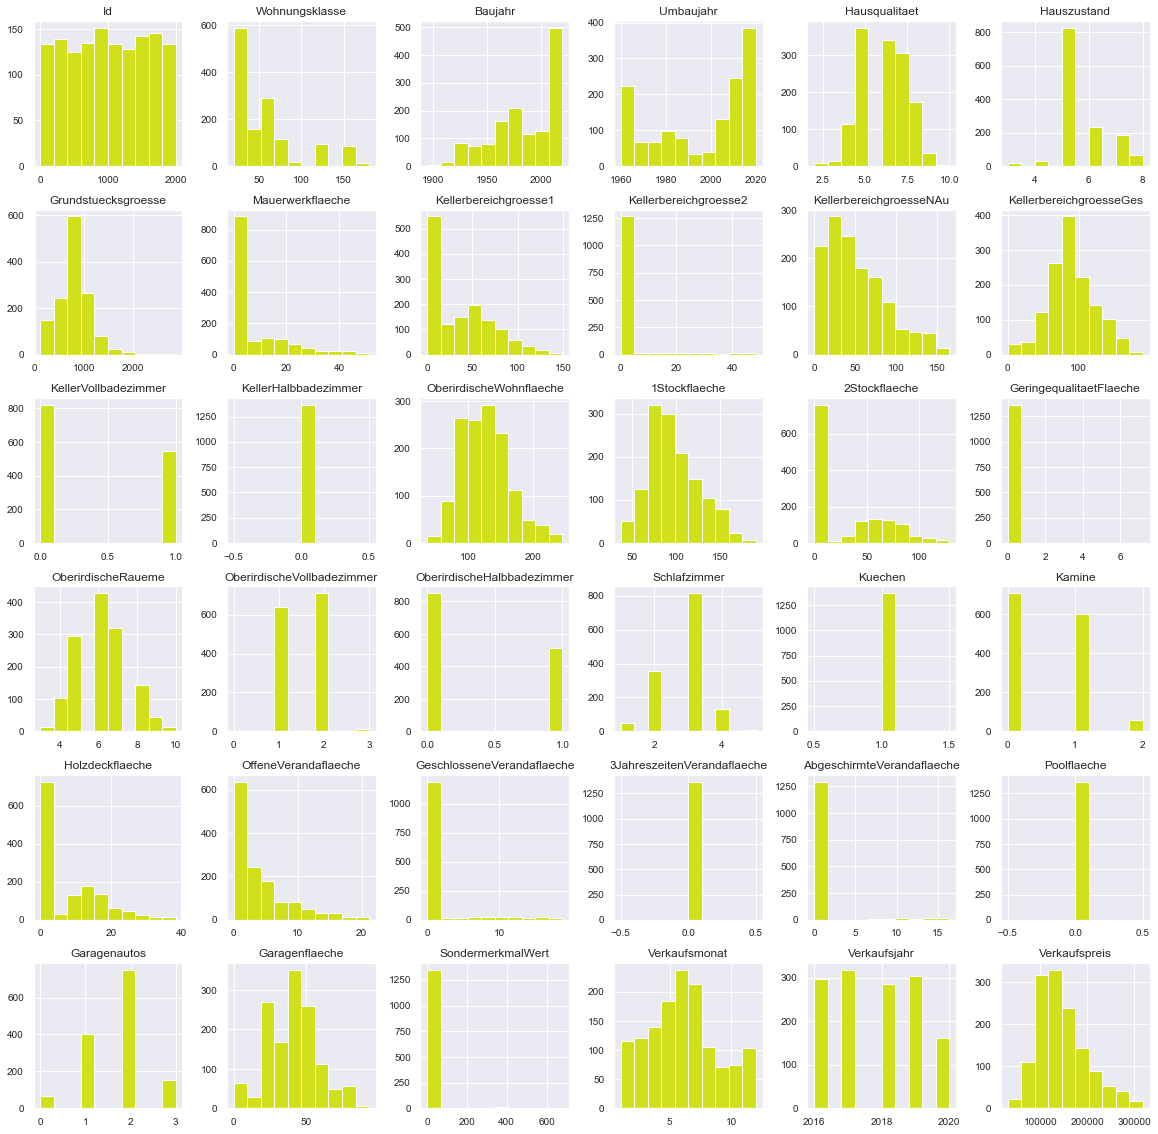

In [53]:
train.hist(figsize=(20, 20), xlabelsize=10, ylabelsize=10,color='#D0E11C');

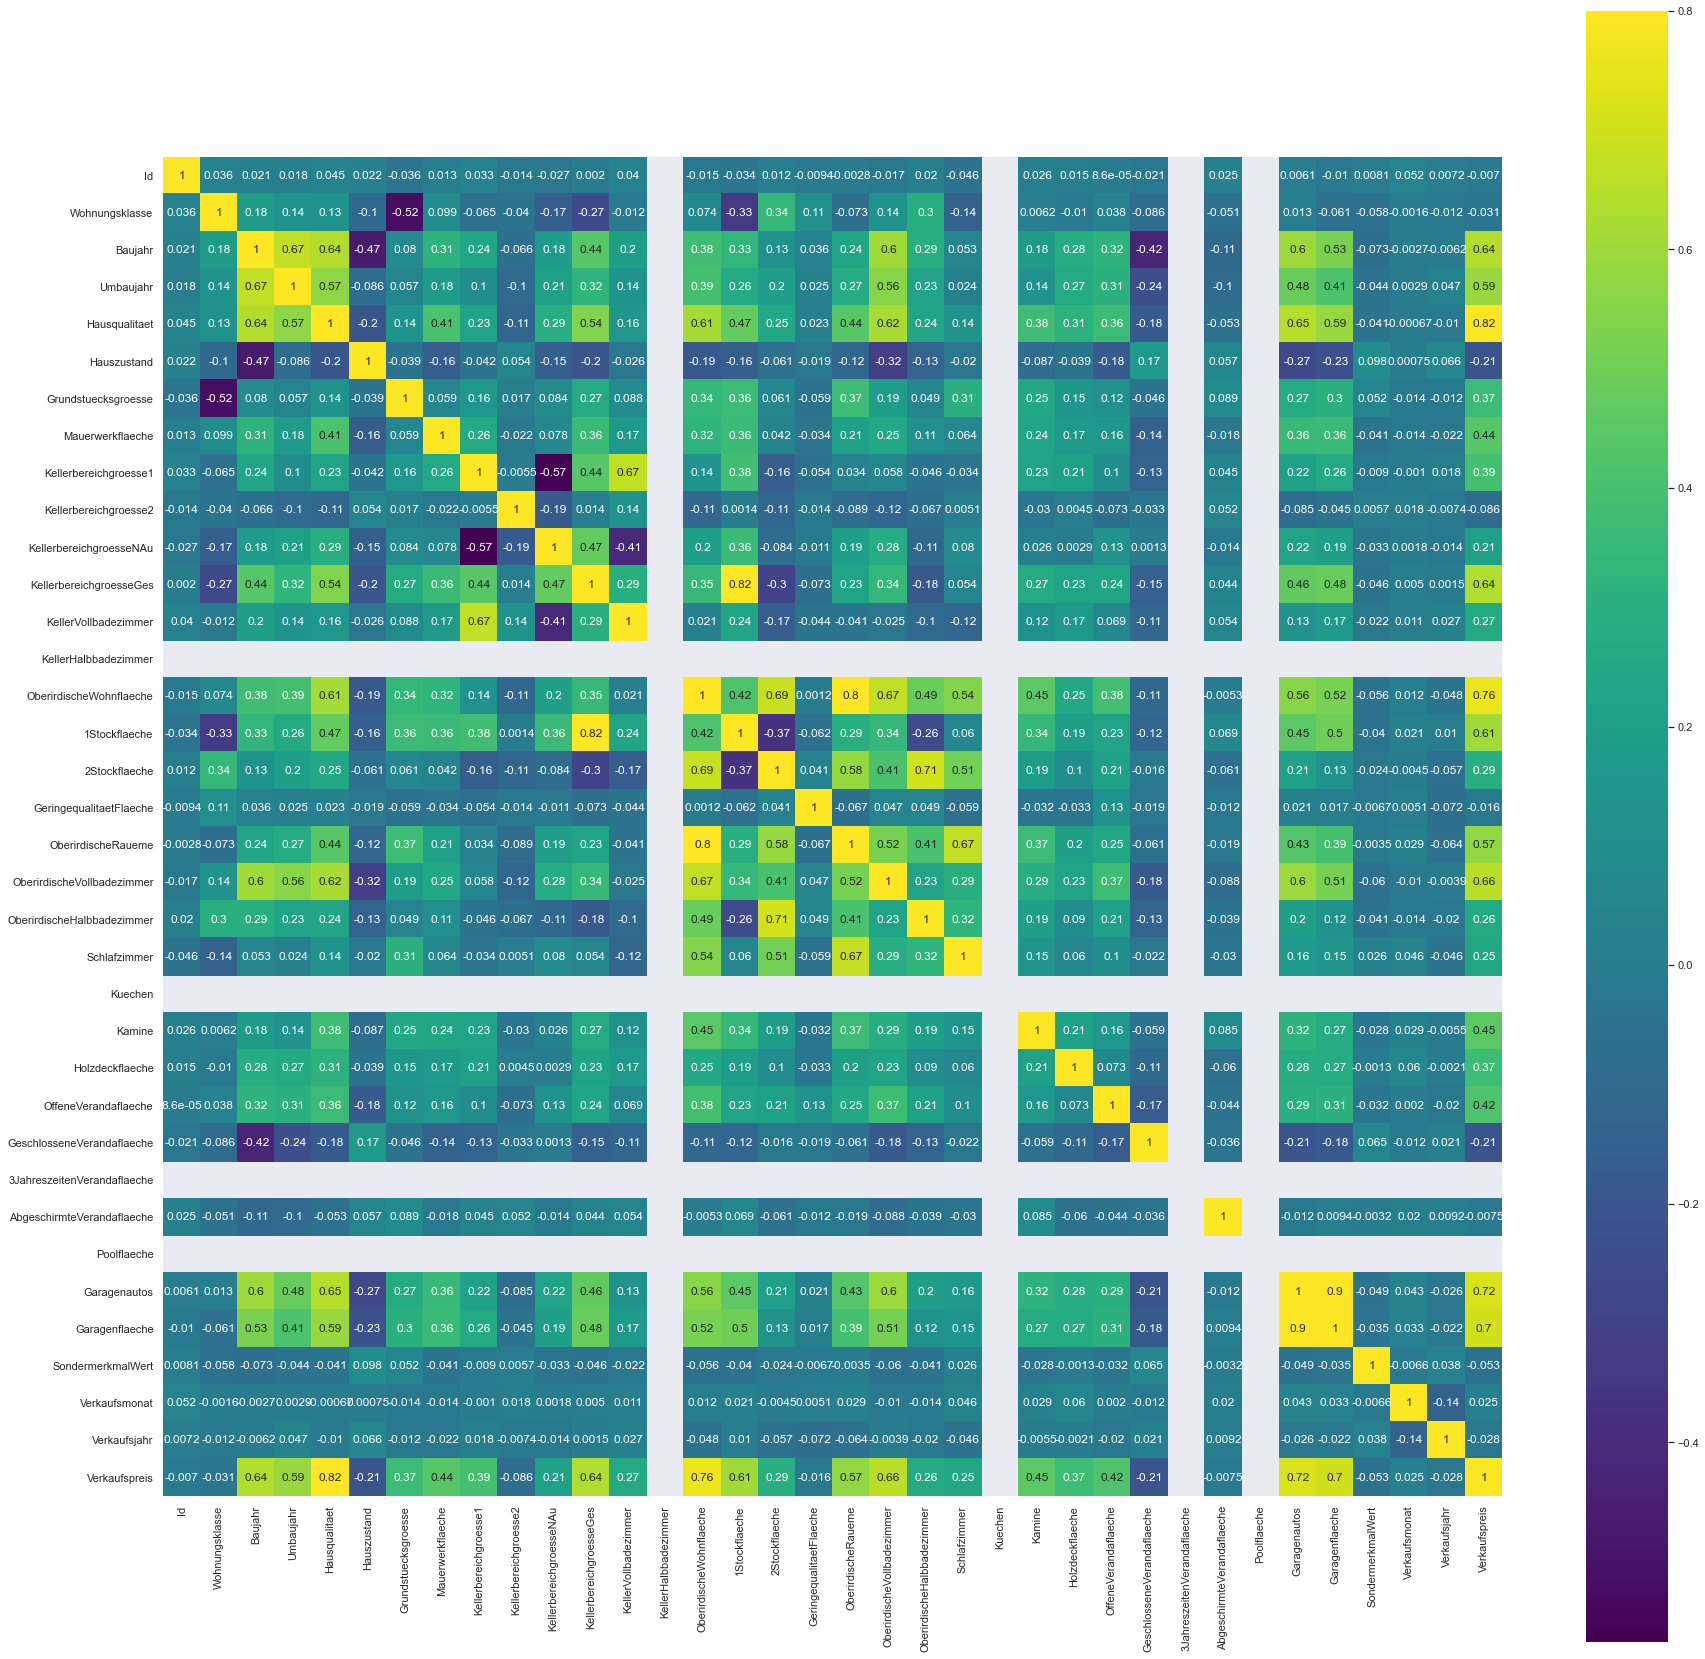

In [54]:
plt.figure(figsize=(30,30))
sn.heatmap(train.select_dtypes('number').corr(),vmax=.8, annot=True,square=True,cmap='viridis');

Some of the columns are taking only one value and we dont really need them 

In [55]:
for i in train.columns:
    if len(set(train[i])) == 1:
        train.drop(columns=[i],inplace=True)


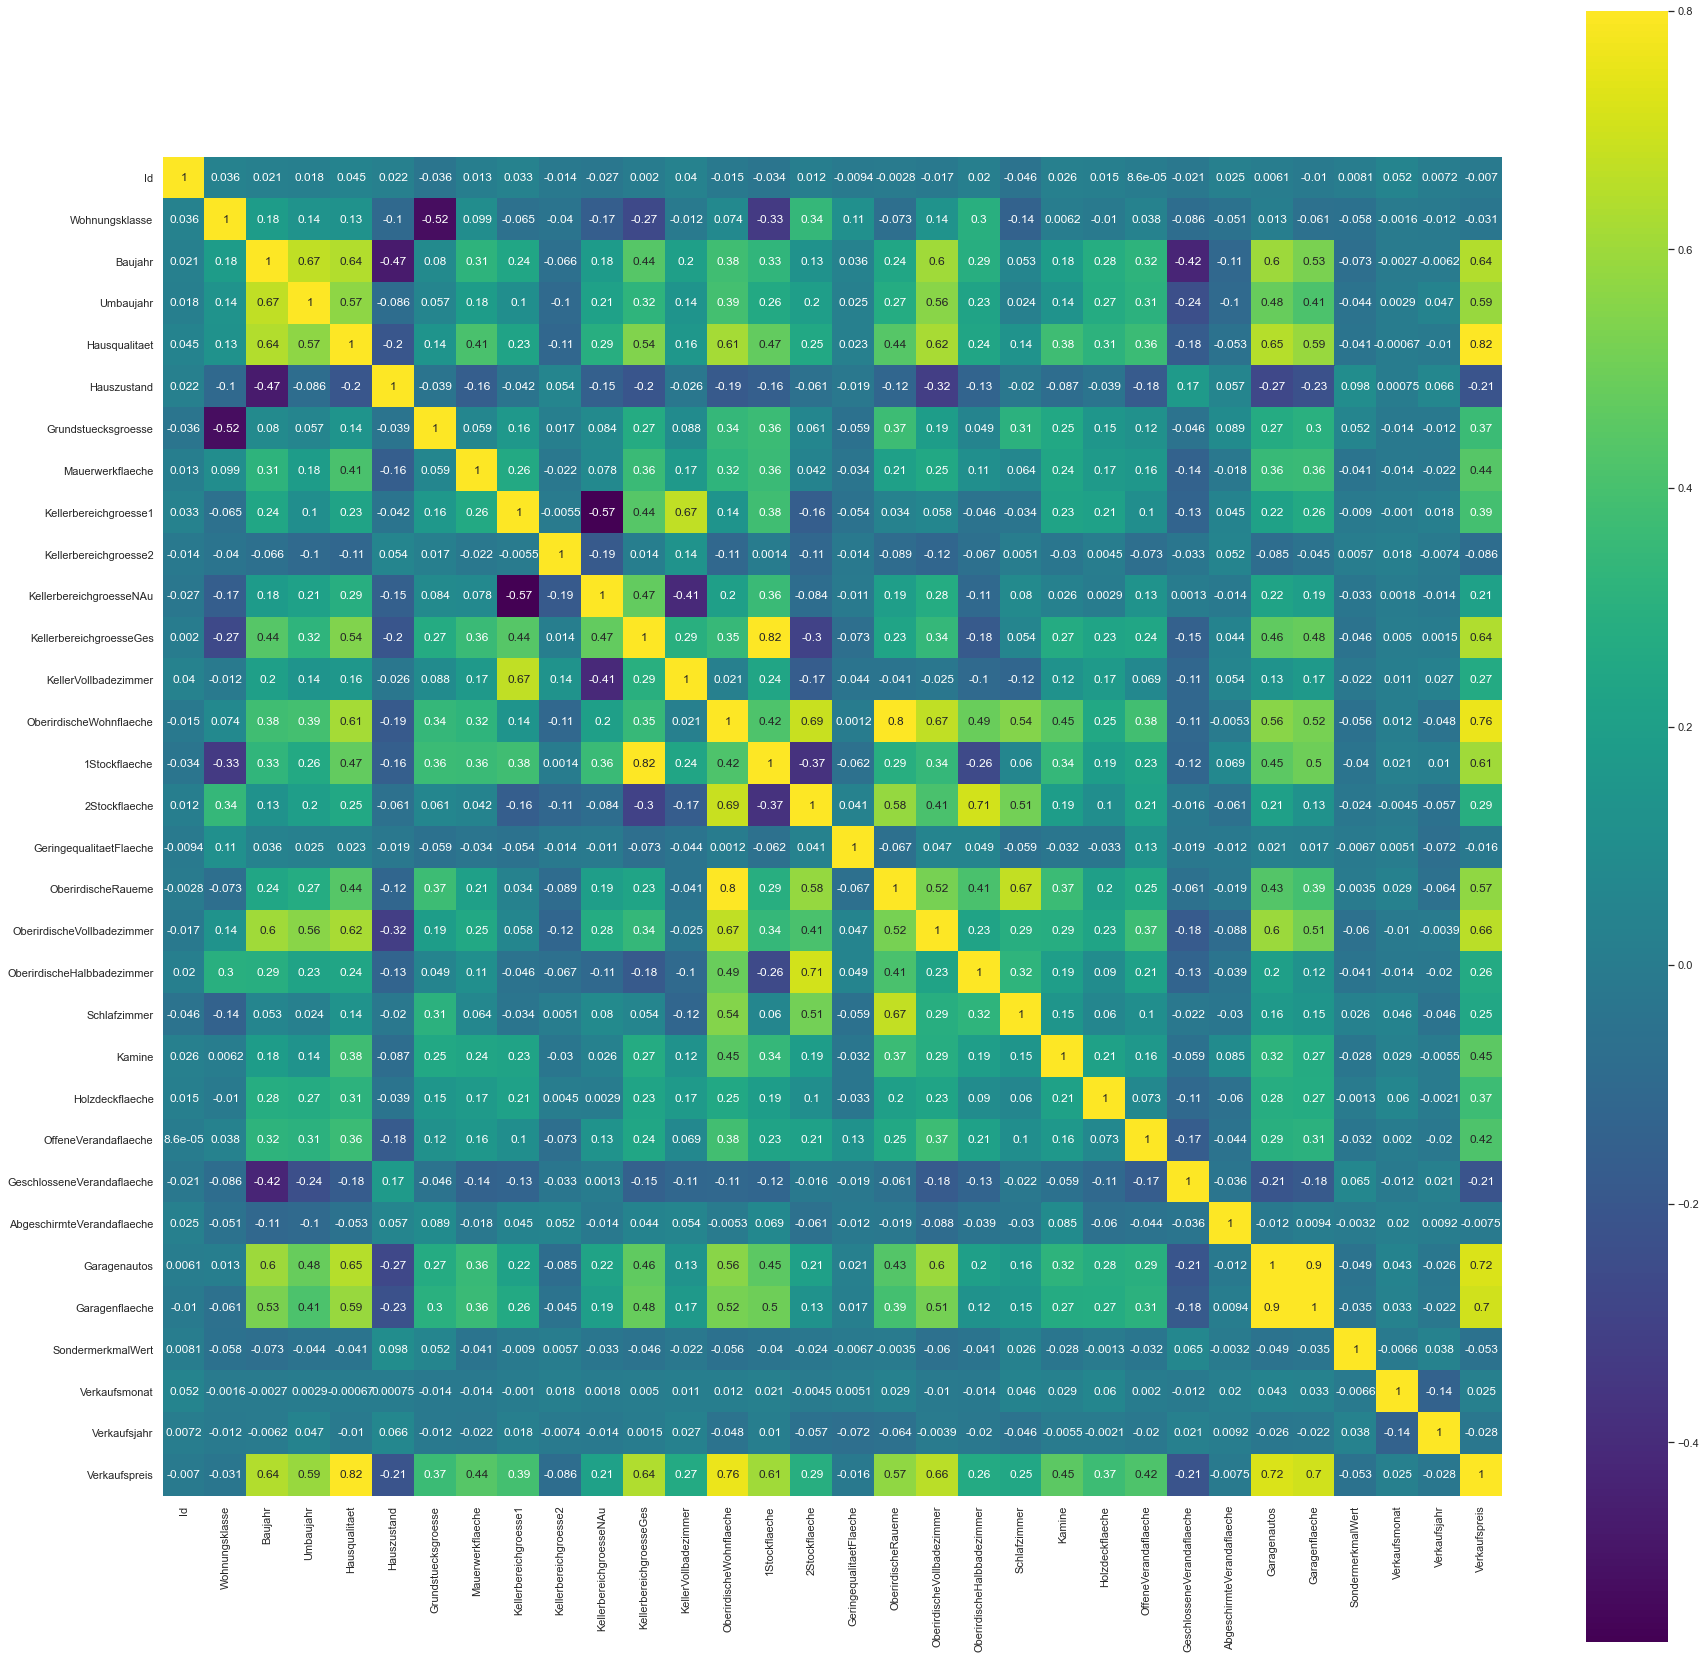

In [56]:
plt.figure(figsize=(30,30))
sn.heatmap(train.select_dtypes('number').corr(),vmax=.8, annot=True,square=True,cmap='viridis');

# Now we cleaned the data fully. Time to visualize some Insights

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 0 to 1999
Data columns (total 73 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          1365 non-null   int64  
 1   Wohngebiet                  1365 non-null   object 
 2   Nachbarschaft               1365 non-null   object 
 3   Bedingung1                  1365 non-null   object 
 4   Bedingung2                  1365 non-null   object 
 5   Wohnungsklasse              1365 non-null   int64  
 6   Gebauedetyp                 1365 non-null   object 
 7   Wohnungsstil                1365 non-null   object 
 8   Baujahr                     1365 non-null   int64  
 9   Umbaujahr                   1365 non-null   int64  
 10  Hausqualitaet               1365 non-null   int64  
 11  Hauszustand                 1365 non-null   int64  
 12  Grundstuecksgroesse         1365 non-null   float64
 13  Grundstuecksform            1365 

In [58]:
import plotly.express as px
grouped = train.groupby('Wohnungsklasse')['Verkaufspreis'].mean()

import json
f = open('data_description.json')
desc = json.load(f)
klasse = desc['Wohnungsklasse']['Werte']
Wohnungsklasse = {}
for key, value in klasse.items():
    Wohnungsklasse[int(key)] = str(value) 

index_list = grouped.index.tolist()
fig =px.bar(y=grouped.values, x=[Wohnungsklasse[i] for i in index_list], labels={'x': 'Wohnungsklasse','y':'Verkaufspreis'},color=grouped.values)
fig.update_layout(title='Mean of Verkaufspreis for each Wohnungsklasse',width=1300, 
    height=1000 )
fig.show()



In [59]:
wohngebiet = desc['Wohngebiet']['Werte']
index_list = train['Wohngebiet'].value_counts().index.tolist()
index_list # discovered a misspelled value inside "G (alle)"

## fixing first 
train_fixed = train
train_fixed.loc[train_fixed['Wohngebiet'] == 'G (alle)', 'Wohngebiet'] = 'G'
index_list_fixed = train['Wohngebiet'].value_counts().index.tolist()
index_list_fixed

# plotting
px.pie(values=train_fixed['Wohngebiet'].value_counts().values,names=[wohngebiet[i] for i in index_list_fixed],title='Number of Houses per Wohngebiet')

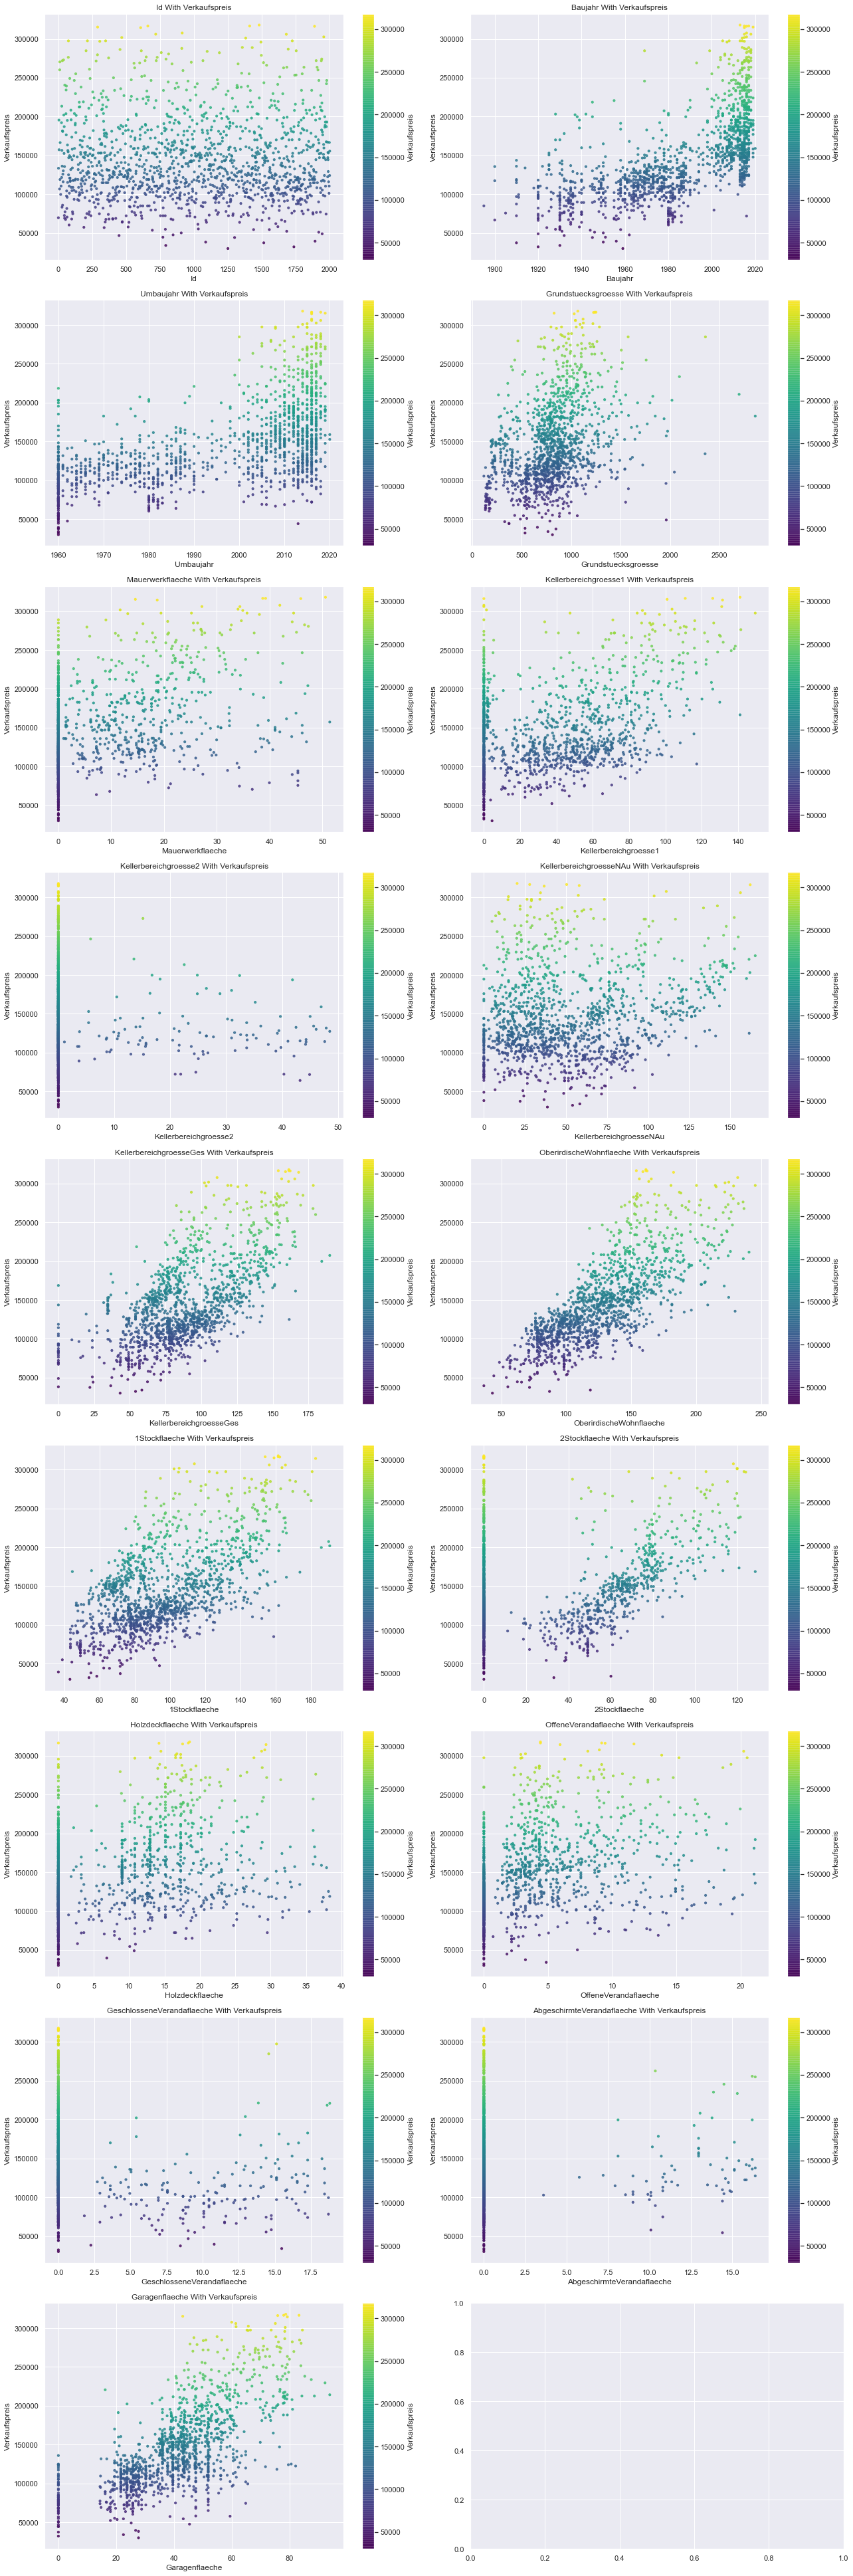

In [60]:
def plot_numeric_column_with_price(ax, x):
    scatter = ax.scatter(x=train[x], y=train['Verkaufspreis'], c=train['Verkaufspreis'], cmap='viridis', alpha=0.8, s=10)
    ax.set(xlabel=x, ylabel='Verkaufspreis', title=f'{x} With Verkaufspreis')
    plt.colorbar(scatter, ax=ax, label='Verkaufspreis')

columns = []
for c in train.select_dtypes('number').columns.tolist():
    if train[f'{c}'].nunique() > 16:
        columns.append(c)
        
num_rows = math.ceil(len(columns[:-1]) / 2)
fig, axes = plt.subplots(num_rows, 2, figsize=(18, 6 * num_rows))
axes = axes.flatten()
for i, column in enumerate(columns[:-1]):
    if i >= len(axes):
        break
    plot_numeric_column_with_price(axes[i], column)

plt.tight_layout()
plt.show()

We can see some of the dependance 

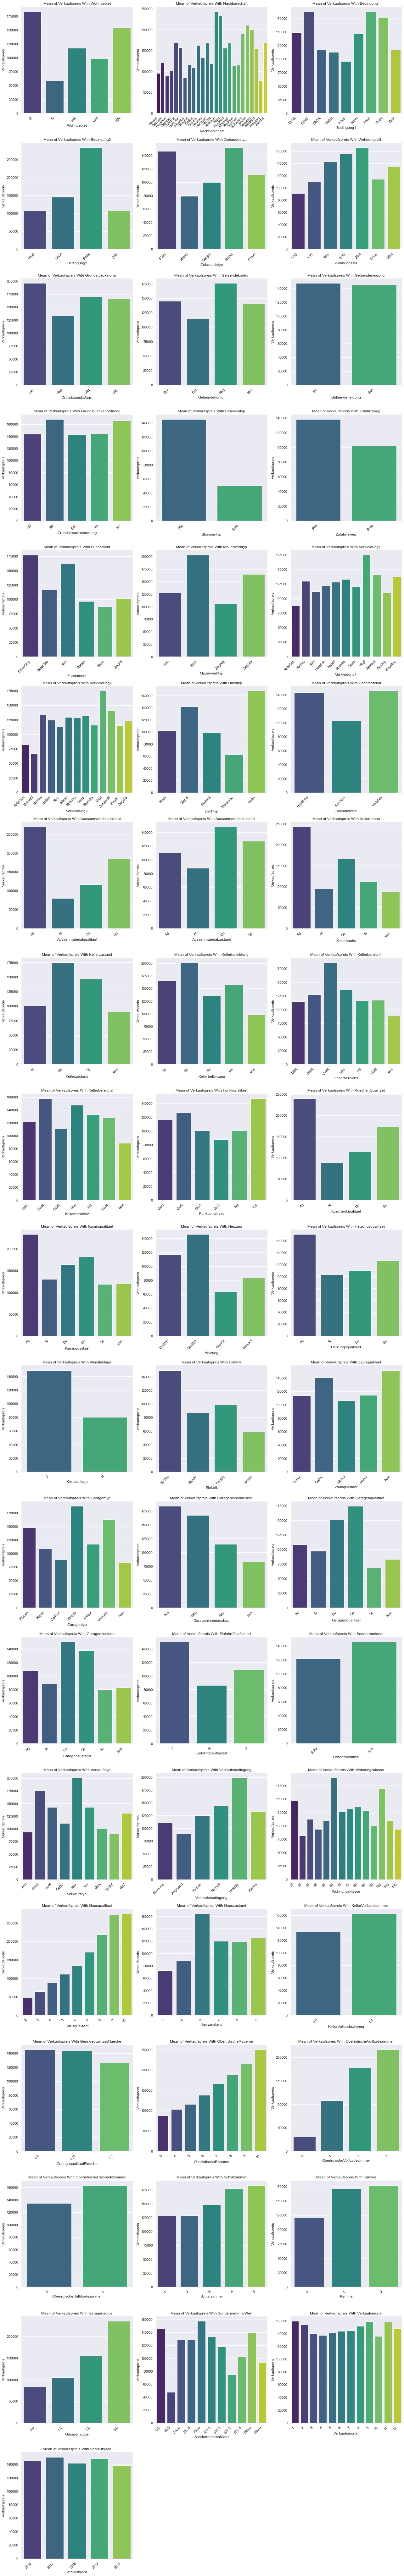

In [61]:
def plot_categorical_column_with_price(x, ax):
    mean = train.groupby(x)['Verkaufspreis'].mean()
    sn.barplot(x=mean.index, y=mean.values, ax=ax,palette='viridis')
    ax.set_xlabel(x)
    ax.set_ylabel('Verkaufspreis')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'Mean of Verkaufspreis With {x}')

columns = train.select_dtypes(exclude='number').columns.tolist()
for c in train.select_dtypes('number').columns.tolist():
    if train[f'{c}'].nunique() <= 16:
        columns.append(c)

num_columns = 3
num_rows = (len(columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 6 * num_rows))

for i, column in enumerate(columns):
    row = i // num_columns
    col = i % num_columns
    if num_rows > 1:
        ax = axes[row, col]
    else:
        ax = axes[col]
    plot_categorical_column_with_price(column, ax)

for i in range(len(columns), num_rows * num_columns):
    row = i // num_columns
    col = i % num_columns
    if num_rows > 1:
        fig.delaxes(axes[row, col])
    else:
        fig.delaxes(axes[col])

plt.tight_layout()
plt.show()

# Data Encoding Für Training : 

In [62]:
df_encoded = pd.get_dummies(train,dtype=float)

## Now the dataset is cleaned and encoded. We need to split train and test + split Verkaufspreis from rest of Matrix

In [107]:
## splitting
## remove id column
index_to_exclude = df_encoded.columns.get_loc('Verkaufspreis')
#df_encoded.drop('Id', inplace=True, axis=1)
X = df_encoded.iloc[:, [i for i in range(df_encoded.shape[1]) if i != index_to_exclude]].values
y = df_encoded.iloc[:,index_to_exclude].values

In [108]:
df_encoded.head()

Wohnungsklasse  Baujahr  Umbaujahr  Hausqualitaet  Hauszustand  \
0              20     1962       1962              3            3   
1              20     2015       2016              5            5   
4              70     1939       1960              8            7   
5              20     1980       1980              6            6   
9              50     1932       2017              4            8   

   Grundstuecksgroesse  Mauerwerkflaeche  Kellerbereichgroesse1  \
0               918.54              0.00                   0.00   
1               632.16              0.00                  88.20   
4              1029.15              0.00                   0.00   
5              1054.53             51.39                   0.00   
9               489.24              0.00                  66.15   

   Kellerbereichgroesse2  KellerbereichgroesseNAu  ...  Verkaufstyp_Ver  \
0                    0.0                     0.00  ...              0.0   
1                    0.0                     9.90  ...              0.0   
4                    0.0                    71.28  ...              0.0   
5                    0.0                   129.78  ...              0.0   
9                    0.0                     5.49  ...              0.0   

   Verkaufstyp_VerA  Verkaufstyp_VerAZ  Verkaufstyp_VerZ  \
0               0.0                0.0               0.0   
1               0.0                0.0               0.0   
4               0.0                0.0               0.0   
5               0.0                0.0               0.0   
9               0.0                0.0               0.0   

   Verkaufsbedingung_Abnormal  Verkaufsbedingung_AngrLand  \
0                         0.0                         0.0   
1                         0.0                         0.0   
4                         0.0                         0.0   
5                         0.0                         0.0   
9                         0.0                         0.0   

   Verkaufsbedingung_Familie  Verkaufsbedingung_Normal  \
0                        0.0                       1.0   
1                        0.0                       1.0   
4                        0.0                       1.0   
5                        0.0                       1.0   
9                        0.0                       1.0   

   Verkaufsbedingung_Unfertig  Verkaufsbedingung_Zuweis  
0                         0.0                       0.0  
1                         0.0                       0.0  
4                         0.0                       0.0  
5                         0.0                       0.0  
9                         0.0                       0.0  

[5 rows x 261 columns]

In [151]:
## train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=329)

In [152]:
## Standardization 
from sklearn.preprocessing import StandardScaler
X_train_nstd = X_train.copy()
X_test_nstd = X_test.copy()
y_train_nstd = y_train.copy()

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1)).flatten()

In [145]:
df_encoded.head()

Wohnungsklasse  Baujahr  Umbaujahr  Hausqualitaet  Hauszustand  \
0              20     1962       1962              3            3   
1              20     2015       2016              5            5   
4              70     1939       1960              8            7   
5              20     1980       1980              6            6   
9              50     1932       2017              4            8   

   Grundstuecksgroesse  Mauerwerkflaeche  Kellerbereichgroesse1  \
0               918.54              0.00                   0.00   
1               632.16              0.00                  88.20   
4              1029.15              0.00                   0.00   
5              1054.53             51.39                   0.00   
9               489.24              0.00                  66.15   

   Kellerbereichgroesse2  KellerbereichgroesseNAu  ...  Verkaufstyp_Ver  \
0                    0.0                     0.00  ...              0.0   
1                    0.0                     9.90  ...              0.0   
4                    0.0                    71.28  ...              0.0   
5                    0.0                   129.78  ...              0.0   
9                    0.0                     5.49  ...              0.0   

   Verkaufstyp_VerA  Verkaufstyp_VerAZ  Verkaufstyp_VerZ  \
0               0.0                0.0               0.0   
1               0.0                0.0               0.0   
4               0.0                0.0               0.0   
5               0.0                0.0               0.0   
9               0.0                0.0               0.0   

   Verkaufsbedingung_Abnormal  Verkaufsbedingung_AngrLand  \
0                         0.0                         0.0   
1                         0.0                         0.0   
4                         0.0                         0.0   
5                         0.0                         0.0   
9                         0.0                         0.0   

   Verkaufsbedingung_Familie  Verkaufsbedingung_Normal  \
0                        0.0                       1.0   
1                        0.0                       1.0   
4                        0.0                       1.0   
5                        0.0                       1.0   
9                        0.0                       1.0   

   Verkaufsbedingung_Unfertig  Verkaufsbedingung_Zuweis  
0                         0.0                       0.0  
1                         0.0                       0.0  
4                         0.0                       0.0  
5                         0.0                       0.0  
9                         0.0                       0.0  

[5 rows x 261 columns]

# Now the data is ready for further usage for machine learning algorithms

## Linear Regression :

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## creating linear model
lm = LinearRegression()
lm.fit(X_train_nstd, y_train_nstd)

## predicting 
y_pred = lm.predict(X_test_nstd) ## predicting on test set
y_train_pred = lm.predict(X_train_nstd) ## predicting on train set 

r2_lm_train = r2_score(y_train_nstd, y_train_pred)
r2_lm_test = r2_score(y_test, y_pred.reshape(-1,1))
print("R2 Train Score:", r2_lm_train)
print("R2 Test Score:", r2_lm_test)
mse_lm_train = mean_squared_error(y_train_nstd, y_train_pred)
mse_lm_test = mean_squared_error(y_test, y_pred.reshape(-1,1))
print("Mean Squared Error of Train:", mse_lm_train)
print("Mean Squared Error of Test:", mse_lm_test)


R2 Train Score: 0.9538125708226624
R2 Test Score: 0.9280976325138293
Mean Squared Error of Train: 132171122.67515363
Mean Squared Error of Test: 200853551.3911862


## Decision Tree Model :

In [155]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)

y_pred = dec_tree.predict(X_test)
y_train_pred = dec_tree.predict(X_train)
r2_tree_train = r2_score(y_train, y_train_pred)
r2_tree_test = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("R2 Train Score:", r2_tree_train)
print("R2 Test Score:", r2_tree_test)
mse_tree_train = mean_squared_error(y_train, y_train_pred)
mse_tree_test = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("Mean Squared Error of Train:", mse_tree_train)
print("Mean Squared Error of Test:", mse_tree_test)

R2 Train Score: 1.0
R2 Test Score: 0.797600705297459
Mean Squared Error of Train: 3.597891104899232e-35
Mean Squared Error of Test: 565386350.4271337


## Random Forest Model :

In [156]:
from sklearn.ensemble import RandomForestRegressor

rdm_frst = RandomForestRegressor(n_estimators = 100)
rdm_frst.fit(X_train, y_train)

y_pred = rdm_frst.predict(X_test)
y_train_pred = rdm_frst.predict(X_train)
r2_frst_train = r2_score(y_train, y_train_pred)
r2_frst_test = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("R2 Train Score:", r2_frst_train)
print("R2 Test Score:", r2_frst_test)
mse_frst_train = mean_squared_error(y_train, y_train_pred)
mse_frst_test = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("Mean Squared Error of Train:", mse_frst_train)
print("Mean Squared Error of Test:", mse_frst_test)

R2 Train Score: 0.9870052451102708
R2 Test Score: 0.9139041466364846
Mean Squared Error of Train: 0.012994754889729246
Mean Squared Error of Test: 240501926.60822812


## Lasso Model With Cross Validation :

In [180]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
model = LassoCV(cv=cv, n_jobs=-1)

#fit model
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
r2_lasso_train = r2_score(y_train, y_train_pred)
r2_lasso_test = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("R2 Train Score:", r2_lasso_train)
print("R2 Test Score:", r2_lasso_test)
mse_lasso_train = mean_squared_error(y_train, y_train_pred)
mse_lasso_test = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("Mean Squared Error of Train:", mse_lasso_train)
print("Mean Squared Error of Test:", mse_lasso_test)



R2 Train Score: 0.9431878301332732
R2 Test Score: 0.9347877021636168
Mean Squared Error of Train: 0.05681216986672675
Mean Squared Error of Test: 182165373.30758315


# Comparison

In [184]:
models = pd.DataFrame(
    {
    'Model': ['Linear Regression','Decision Tree','Random Forest','Lasso with Cross Validation'],
    'Train R2 Score' : [r2_lm_train,r2_tree_train,r2_frst_train,r2_lasso_train],
    'Train Mean Square Error' : [mse_lm_train,mse_tree_train,mse_frst_train,mse_lasso_train],
    'Test R2 Score' : [r2_lm_test,r2_tree_test,r2_frst_test,r2_lasso_test],
    'Test Mean Square Error' : [mse_lm_train,mse_tree_train,mse_frst_train,mse_lasso_train]
    }
)

models.sort_values(by='Test R2 Score', ascending=False).style.background_gradient(
        cmap='Blues')